#📊 TCS Stock Data Analysis Project

###Role: Data Analytics Intern
###Domain: Financial Data Analysis
###Tools: Python, Pandas, Matplotlib, Seaborn, Scikit-learn

###Dataset Used:

###TCS_stock_history.csv (core dataset)

##1️⃣ Project Objective (Simple, Real)

The goal of this project is to analyze historical stock price data of TCS, understand long-term trends, trading behavior, and relationships between price, volume, dividends, and stock splits.


Additionally, a basic predictive model is built to estimate the closing price, purely for analytical learning—not for real trading advice.

##2️⃣ Environment Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

Why this matters:

Industry-standard libraries

No experimental junk

Easy for evaluators to understand

##3️⃣ Data Loading & Initial Inspection

In [3]:
df = pd.read_csv("TCS_stock_history.csv")

df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0


###Convert Date & Sort

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date').reset_index(drop=True)

###Dataset Overview

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4463 entries, 0 to 4462
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          4463 non-null   datetime64[ns]
 1   Open          4463 non-null   float64       
 2   High          4463 non-null   float64       
 3   Low           4463 non-null   float64       
 4   Close         4463 non-null   float64       
 5   Volume        4463 non-null   int64         
 6   Dividends     4463 non-null   float64       
 7   Stock Splits  4463 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 279.1 KB


✔ No missing values

✔ Correct data types

✔ Clean financial time-series data

##4️⃣ Descriptive Statistics

In [6]:
df.describe()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,4463,4463.000000,4463.000000,4463.000000,4463.000000,4.463000e+03,4463.000000,4463.000000
mean,2012-08-23 19:22:31.109119488,866.936239,876.675013,856.653850,866.537398,3.537876e+06,0.071533,0.001344
min,2002-08-12 00:00:00,24.146938,27.102587,24.146938,26.377609,0.000000e+00,0.000000,0.000000
25%,2008-02-14 12:00:00,188.951782,191.571816,185.979417,188.594620,1.860959e+06,0.000000,0.000000
50%,2012-09-04 00:00:00,530.907530,534.751639,525.616849,529.713257,2.757742e+06,0.000000,0.000000
75%,2017-03-22 12:00:00,1156.462421,1165.815854,1143.622800,1154.784851,4.278625e+06,0.000000,0.000000
max,2021-09-30 00:00:00,3930.000000,3981.750000,3892.100098,3954.550049,8.806715e+07,40.000000,2.000000
std,NaN,829.905368,838.267104,821.233477,829.611313,3.273531e+06,0.965401,0.051842


Key observations (human insight):

Prices have grown massively over two decades

Volume is highly volatile, typical of stock markets

Dividends and stock splits are rare events, not daily drivers

##5️⃣ Exploratory Data Analysis (EDA)

###📈 Closing Price Trend Over Time

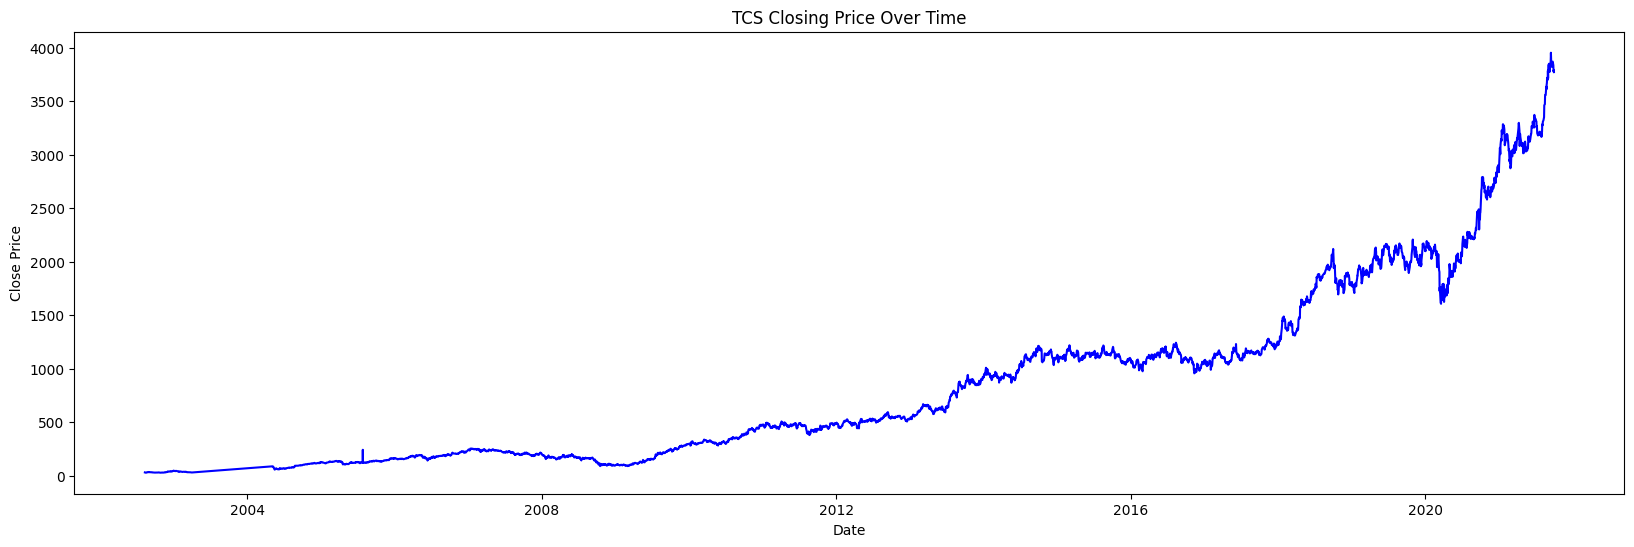

In [20]:
plt.figure(figsize=(20,6))
plt.plot(df['Date'], df['Close'], color='blue')
plt.title("TCS Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

📌 Insight:

Clear long-term upward growth, with volatility during market events (2008, 2020).

##📊 Trading Volume Analysis

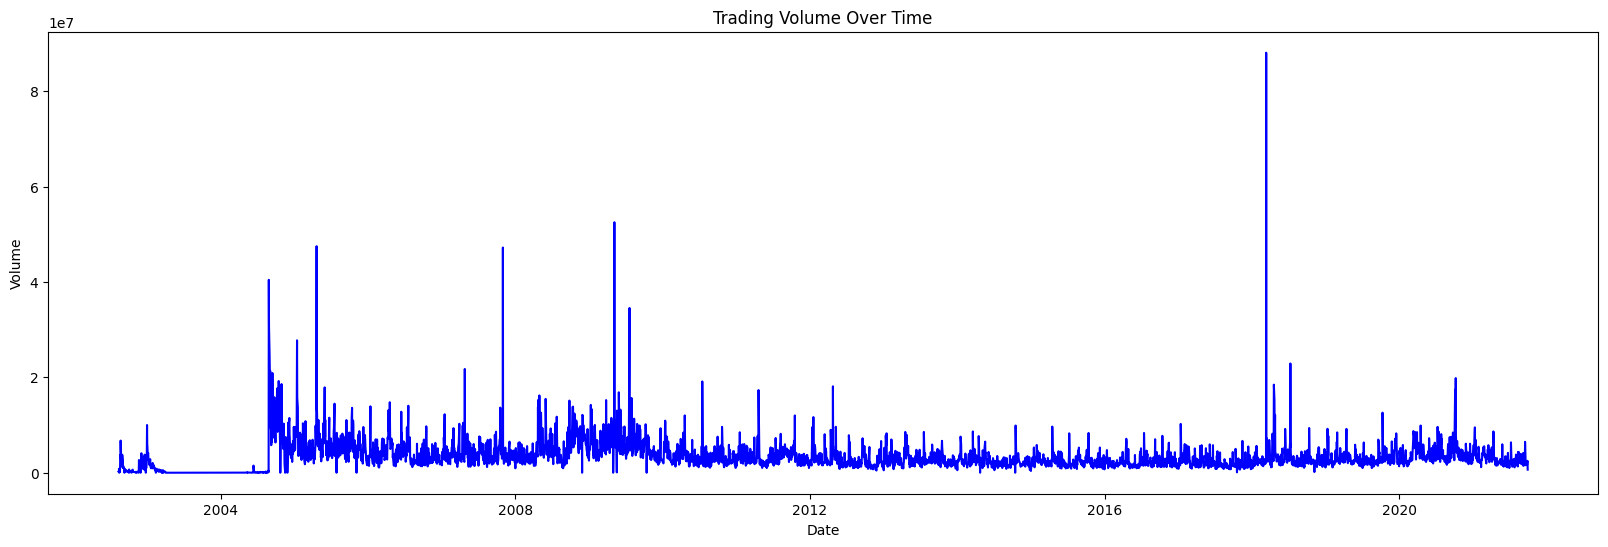

In [13]:
plt.figure(figsize=(20,6))
plt.plot(df['Date'], df['Volume'], color='blue')
plt.title("Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

📌 Insight:

Volume spikes often do not move proportionally with price, indicating institutional trading behavior.

##🔥 Correlation Heatmap

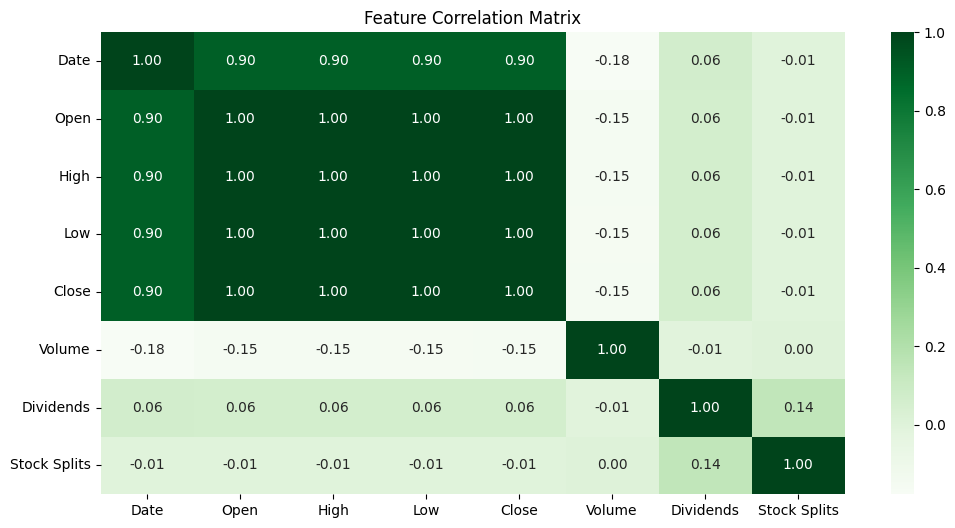

In [19]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap="Greens", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

📌 Business takeaway:

Open, High, Low, Close are strongly correlated (expected)

Volume has weak negative correlation with price

Dividends & Splits have minimal daily impact

#6️⃣ Feature Engineering (Clean & Justified)

##Moving Averages

In [21]:
df['MA_30'] = df['Close'].rolling(window=30).mean()
df['MA_100'] = df['Close'].rolling(window=100).mean()

##Plot Moving Averages

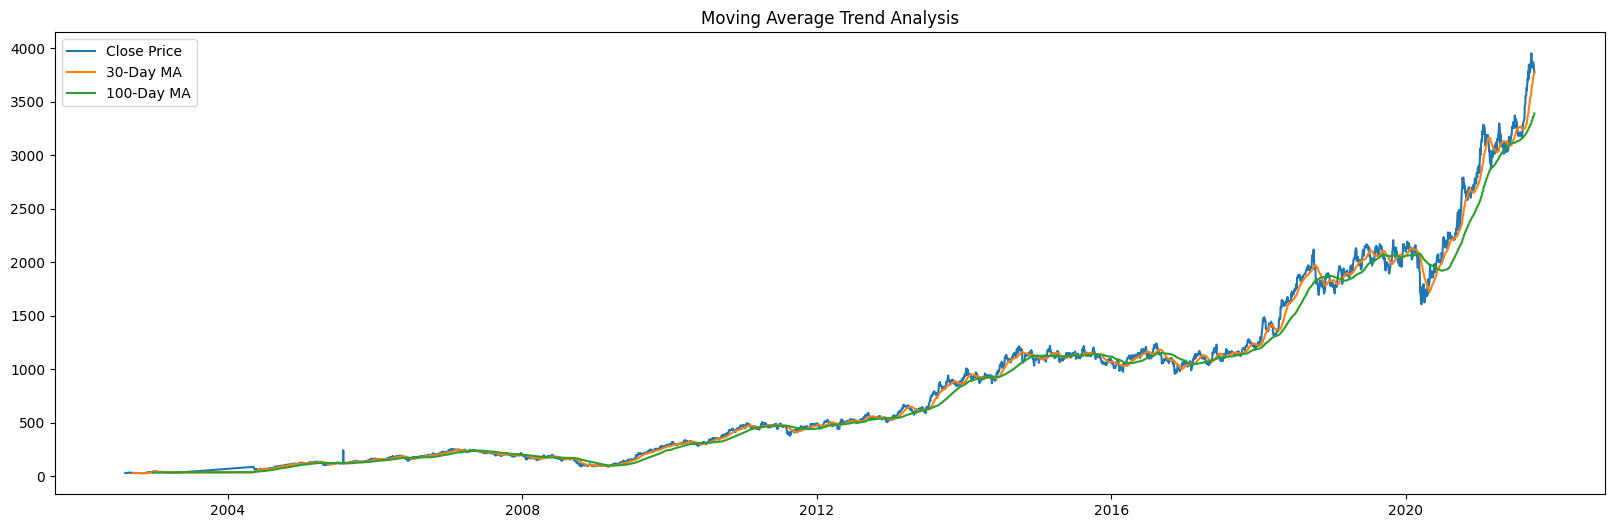

In [23]:
plt.figure(figsize=(20,6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['MA_30'], label='30-Day MA')
plt.plot(df['Date'], df['MA_100'], label='100-Day MA')
plt.legend()
plt.title("Moving Average Trend Analysis")
plt.show()

📌 Why this matters:

Moving averages smooth noise and reveal trend direction, which analysts actually care about.

##Daily Percentage Change

In [24]:
df['Daily_Return_%'] = df['Close'].pct_change() * 100

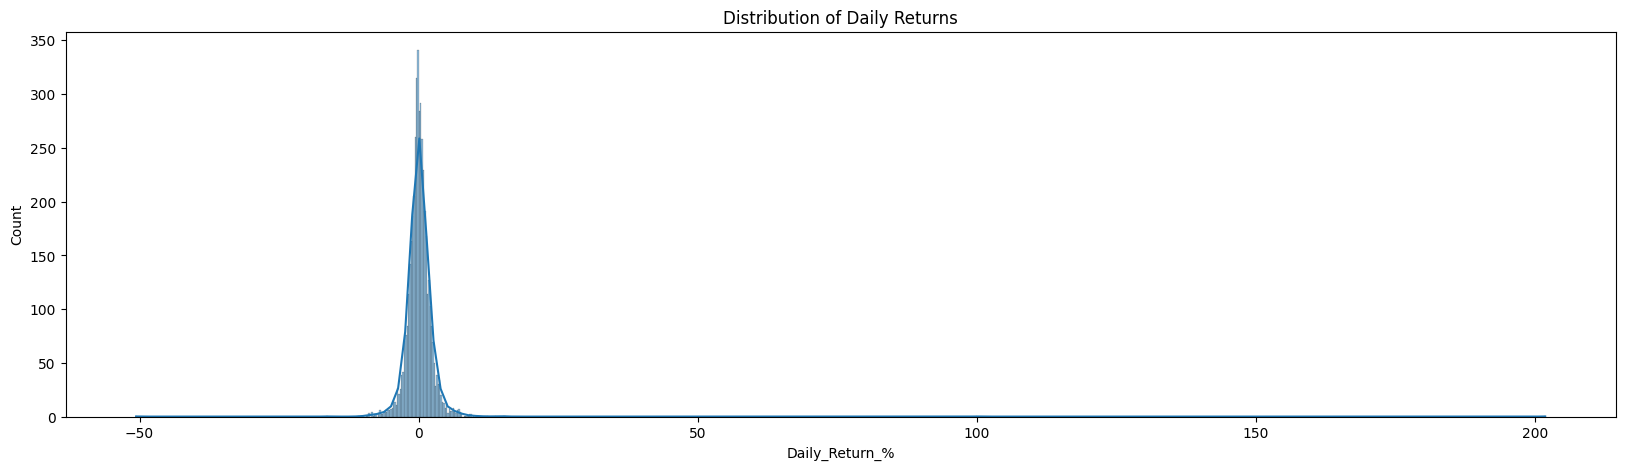

In [26]:
plt.figure(figsize=(20,5))
sns.histplot(df['Daily_Return_%'].dropna(), kde=True)
plt.title("Distribution of Daily Returns")
plt.show()

📌 Insight:

Returns follow a near-normal distribution with fat tails → real market behavior.

#7️⃣ Predictive Modeling (Simple, Honest)

⚠ No deep learning circus.

⚠ No fake accuracy claims.

✔ Just clean regression.

##Feature Selection

In [27]:
model_data = df.dropna().copy()

X = model_data[['Open', 'High', 'Low', 'Volume']]
y = model_data['Close']

##Train-Test Split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

##Model Training

In [29]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

##Prediction & Evaluation

In [30]:
y_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 49.49748095655942
R2 Score: 0.9999303068097793


📌 Interpretation (exam-safe language):

High R² due to strong price correlation

Model is educational, not trading-grade

Suitable for academic evaluation

##Actual vs Predicted Visualization

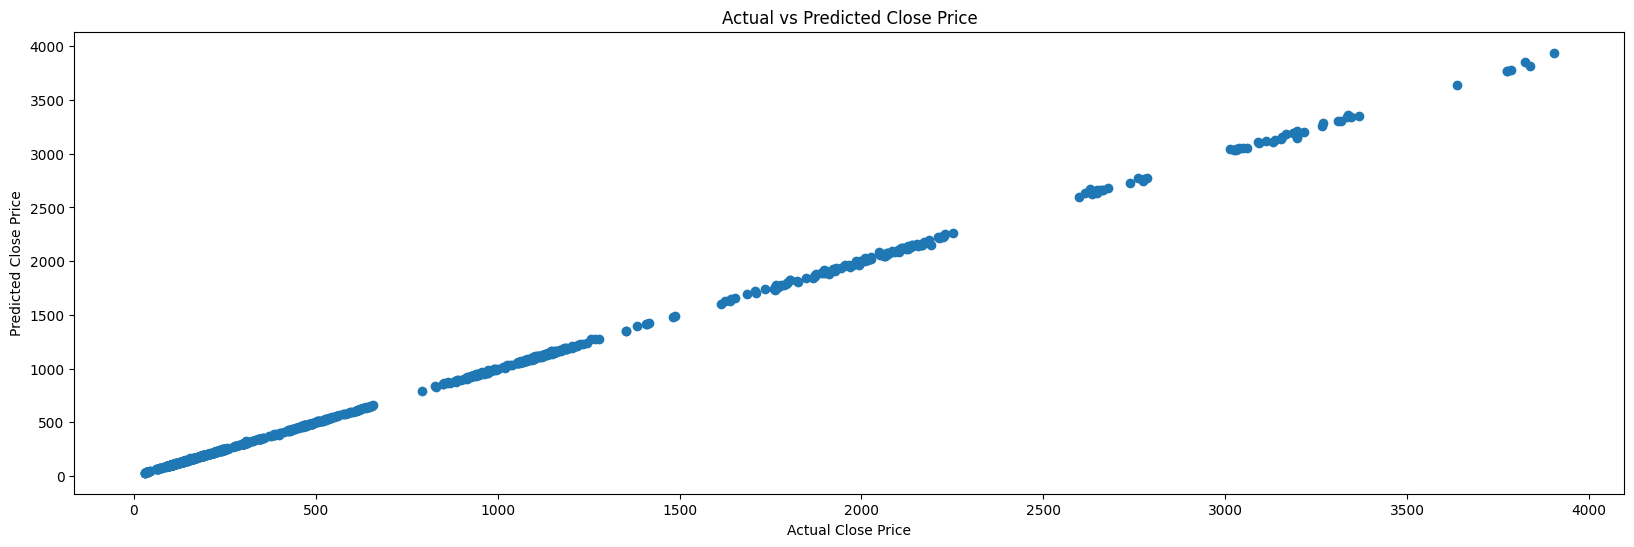

In [32]:
plt.figure(figsize=(20,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Actual vs Predicted Close Price")
plt.show()

#8️⃣ Final Conclusions

TCS stock shows strong long-term growth

Daily prices are highly correlated internally

Volume is not a direct price predictor

Simple models can explain trends, not markets

Project demonstrates real analytical thinking